# Testo de los modelos entrenados para PQR nivel 1

En este libro se testean los modelos entrandos en el libro PQRnivel1.ipynb. El libro en una primera instancia hace un proprocesamiento de los nuevos registros, esto es seleccionar aquellos registros que provengan de las siguientes fuentes: web y email.Para esto se tomarán las PQR de diciembre y enero dando un total de 741 registros a testear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_dic = pd.read_csv('PQR_2020-12.csv')
data_dic.head()

C:\Users\juand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,601180ac1d4f1829b8fafa90,PQR_202012_1,verbal,1093221111,JHONATAN SILVA,CRA 16 22 29 - BARRIO SIN DEFINIR,peticion,101106357,2020/12/18,2021/01/12,...,Santa Rosa,3.65663e+06,3.2077e+09,NaN,HER23L15,D23516,U,Residencial,202012,PQR
1,601180ac1d4f1829b8fafa91,PQR_202012_2,verbal,206943,IDARRGA FERNANDI,CRA 16 22 29 - BARRIO SIN DEFINIR,peticion,101106357,2020/12/18,2021/01/12,...,Santa Rosa,3.65663e+06,3.2077e+09,NaN,HER23L15,D23516,U,Residencial,202012,PQR
2,601180ac1d4f1829b8fafa92,PQR_202012_3,verbal,52068043,ADRIANA GRANADA,CLL 33 12 16,peticion,101176660,2020/12/18,2021/01/12,...,Santa Rosa,NaN,3.17291e+09,NaN,HER23L15,D23537,U,Residencial,202012,PQR
3,601180ac1d4f1829b8fafa93,PQR_202012_4,verbal,18591705,DARIO MARTINEZ,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2020/12/17,2021/01/11,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202012,PQR
4,601180ac1d4f1829b8fafa94,PQR_202012_5,telefonico,4583845,ANDRES FELIPE RAMIRES,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2020/12/17,2021/01/11,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202012,PQR


In [3]:
data_jan = pd.read_csv('PQR_2021-01.csv')
data_jan.head()

C:\Users\juand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,602866a71d4f183238e145b9,PQR_202101_1,verbal,25161756,ADIELA CARDONA GONZALEZ,CRA 16 18 66 - BARRIO SIN DEFINIR,peticion,101184075,2021/01/19,2021/02/08,...,Santa Rosa,NaN,NaN,NaN,HER23L12,D20299,U,Residencial,202101,PQR
1,602866a71d4f183238e145ba,PQR_202101_2,verbal,206864,RIGOBERTO SANCHEZ,CLL 18 15 25 - BARRIO SIN DEFINIR,peticion,101201209,2021/01/04,2021/01/25,...,Santa Rosa,3.6469e+06,NaN,NaN,HER23L13,D21189,U,Residencial,202101,PQR
2,602866a71d4f183238e145bb,PQR_202101_3,verbal,18591705,RAMON DARIO MARTINEZ GOMEZ,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2021/01/06,2021/01/27,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202101,PQR
3,602866a71d4f183238e145bc,PQR_202101_4,verbal,206840,ANA TULIA SEPULVEDA DE A.,CRA 15 18 63 - BARRIO SIN DEFINIR,peticion,101228526,2021/01/04,2021/01/25,...,Santa Rosa,NaN,NaN,NaN,HER23L12,D20299,U,Residencial,202101,PQR
4,602866a71d4f183238e145bd,PQR_202101_5,verbal,206799,MARIA GOMEZ SOTO GOMEZ,CLL 20 15 15 PSO 2 - BARRIO SIN DEFINIR,peticion,101274963,2021/01/30,2021/02/19,...,Santa Rosa,NaN,3.11739e+09,NaN,HER23L15,D23553,U,Residencial,202101,PQR


In [4]:
df = pd.concat([data_dic, data_jan], ignore_index=True)
df.head()

,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,601180ac1d4f1829b8fafa90,PQR_202012_1,verbal,1093221111,JHONATAN SILVA,CRA 16 22 29 - BARRIO SIN DEFINIR,peticion,101106357,2020/12/18,2021/01/12,...,Santa Rosa,3.65663e+06,3.2077e+09,NaN,HER23L15,D23516,U,Residencial,202012,PQR
1,601180ac1d4f1829b8fafa91,PQR_202012_2,verbal,206943,IDARRGA FERNANDI,CRA 16 22 29 - BARRIO SIN DEFINIR,peticion,101106357,2020/12/18,2021/01/12,...,Santa Rosa,3.65663e+06,3.2077e+09,NaN,HER23L15,D23516,U,Residencial,202012,PQR
2,601180ac1d4f1829b8fafa92,PQR_202012_3,verbal,52068043,ADRIANA GRANADA,CLL 33 12 16,peticion,101176660,2020/12/18,2021/01/12,...,Santa Rosa,NaN,3.17291e+09,NaN,HER23L15,D23537,U,Residencial,202012,PQR
3,601180ac1d4f1829b8fafa93,PQR_202012_4,verbal,18591705,DARIO MARTINEZ,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2020/12/17,2021/01/11,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202012,PQR
4,601180ac1d4f1829b8fafa94,PQR_202012_5,telefonico,4583845,ANDRES FELIPE RAMIRES,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2020/12/17,2021/01/11,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202012,PQR


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54128 entries, 0 to 54127
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    54128 non-null  object 
 1   ID                     54128 non-null  object 
 2   forma_requerimiento    54128 non-null  object 
 3   identificacion         54128 non-null  int64  
 4   solicitante            54128 non-null  object 
 5   dir_solicitante        54127 non-null  object 
 6   tipo_solicitud         54128 non-null  object 
 7   cuenta                 54128 non-null  int64  
 8   fec_solicitud          54128 non-null  object 
 9   fec_vencmto            54128 non-null  object 
 10  fec_rpta               54128 non-null  object 
 11  clase_inicial          0 non-null      float64
 12  estrato                54128 non-null  object 
 13  a_favor_de             54128 non-null  object 
 14  tipo_solicitud_1       54128 non-null  object 
 15  do

In [6]:
df['forma_requerimiento'].value_counts()

verbal             41173
telefonico         11260
pagina web           600
escrito              477
chat                 253
asesor remoto        189
e-mail               147
terminal sirius       23
portal sac             5
app                    1
Name: forma_requerimiento, dtype: int64

In [7]:
df_test = pd.concat([df[df['forma_requerimiento']=='pagina web'], df[df['forma_requerimiento']=='e-mail']], ignore_index=True)
df_test.head(3)

,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,601180ac1d4f1829b8fafab3,PQR_202012_36,pagina web,21482505,GLORIA PATRICIA CASTAÑO RAMIREZ,CRA 14 29 01 - BARRIO SIN DEFINIR,peticion,102046035,2020/12/01,2020/12/22,...,Santa Rosa,NaN,3.13508e+09,NaN,HER23L15,D23109,U,Comercial,202012,PQR
1,601180ae1d4f1829b8fafb1c,PQR_202012_141,pagina web,18594889,JOSE ALEXANDER RAMIREZ RIVERA,CLL 16 10 35 SUB - BARRIO SIN DEFINIR,peticion,104369423,2020/11/25,2020/12/16,...,Santa Rosa,6.365e+07,3.1044e+09,False,HER23L12,D20366,U,Comercial,202012,PQR
2,601180ae1d4f1829b8fafbe3,PQR_202012_340,pagina web,1093216909,ALEXANDER CORREA,CLL 13 14 30 APT 201 - BARRIO SIN DEFINIR,reclamo,108084591,2020/11/12,2020/12/03,...,Santa Rosa,6.36421e+07,3.13686e+09,NaN,HER23L13,D20605,U,Comercial,202012,PQR


In [8]:
df_test['tipo_solicitud'].value_counts()

peticion                                       467
reclamo                                        104
pedidos/proyectos                              101
queja                                           43
recurso reposicion en subsidio de apelacion     19
recurso de reposicion                            7
programa de financiacion social                  6
Name: tipo_solicitud, dtype: int64

In [9]:
df_test['tipo_solicitud'] = df_test['tipo_solicitud'].map(lambda x: 'recurso' if x=='recurso reposicion en subsidio de apelacion' or x=='recurso de reposicion' else x)
df_test['tipo_solicitud'] = df_test['tipo_solicitud'].map(lambda x: 'peticion' if x=='programa de financiacion social' or x=='autogestion' else x)

In [10]:
df_test['OBSERVACION USUARIO'] = df_test['OBSERVACION USUARIO'].map(lambda x: str(x))
df_test['OBSERVACION USUARIO'] = df_test['OBSERVACION USUARIO'].map(lambda x: x.lower())
len_obs_usuario = [(i, len(o)) for i, o in enumerate(df_test['OBSERVACION USUARIO'])]
len_menor_x = [(i,o) for i, o in sorted(len_obs_usuario, key=lambda t: t[1]) if o <=20]
index_menor_x = [i for i, o in len_menor_x]
len(index_menor_x)

5

In [11]:
df_test['tipo_solicitud'].value_counts()

peticion             473
reclamo              104
pedidos/proyectos    101
queja                 43
recurso               26
Name: tipo_solicitud, dtype: int64

In [12]:
import re
import spacy
import nltk
nltk.download('stopwords')
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.collocations import *
from spellchecker import SpellChecker
nlp = spacy.load('es_core_news_md')

def text_normalization(text):
    stop_words = list(stopwords.words('spanish'))  
    no_value_words = ['fecha', 'valor']
    for w in no_value_words:
        stop_words.append(w)
    text = str(text)
    text = text.lower()
    text = ' '.join(re.findall(r'[a-záéíóúñ]{2,}', text))
    
    text = word_tokenize(text)
    for w in stop_words:
        while w in text: text.remove(w)
    return' '.join(list(dict.fromkeys(text)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df_test['OBSERVACION USUARIO']

0      observaciones: con el fin de acceder a la exen...
1            observaciones: exoneracion de contribucion 
2                                        consumo elevado
3      observaciones: exoneración de contribución de ...
4      observaciones: solicito la exoneracion de cont...
                             ...                        
742    tan amable me comparten una copia de la factur...
743    de acuerdo a las observaciones realizadas por ...
744    amablemente notificamos que el usuario consoli...
745    adjunto documento para solicitud de factibilid...
746        usuario solicita recibo de pago de proyectos.
Name: OBSERVACION USUARIO, Length: 747, dtype: object

In [14]:
text_normalization(df_test['OBSERVACION USUARIO'][737])

'correcciones solicitud idema'

## Testeo del modelo LinearSCV_PQR.sav

Vale la pena aclarar la estructura de este modelo:
pipeline compuesto por:
- extracción de características: TF-IDF con unigramas sin limite de frecuencia de documentos ni palabras
- clasificador: SVM con kernel lineal y un parámetro de regularización C=10

In [15]:
import pickle
text_clf = pickle.load(open('LinearSCV_PQR.sav', 'rb'))

In [16]:
from sklearn import metrics

y_test = df_test['tipo_solicitud']
predictions = text_clf.predict(df_test['OBSERVACION USUARIO'])

test_acc = metrics.accuracy_score(y_test, predictions)

print(f"El accuracy en validación es de {round(test_acc, 3)}")

El accuracy en validación es de 0.79


In [17]:
print(metrics.classification_report(y_test, predictions))

                   precision    recall  f1-score   support

pedidos/proyectos       0.66      0.91      0.77       101
         peticion       0.94      0.77      0.85       473
            queja       0.51      0.81      0.63        43
          reclamo       0.62      0.81      0.70       104
          recurso       0.84      0.62      0.71        26

         accuracy                           0.79       747
        macro avg       0.72      0.78      0.73       747
     weighted avg       0.83      0.79      0.80       747



Precisión del clasificador: 78.98 

Matriz de Confusión: 
 [[ 92   2   2   5   0]
 [ 41 363  30  38   1]
 [  2   4  35   2   0]
 [  4  13   1  84   2]
 [  0   3   0   7  16]]


<AxesSubplot:>

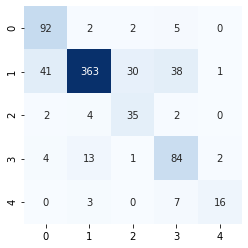

In [18]:
import seaborn as sns

#Calculamos la precisión y mostramos la matriz de confusión
acc = metrics.accuracy_score(y_test, predictions)
mat = metrics.confusion_matrix(y_test, predictions)

print ("Precisión del clasificador: %.2f " %(acc*100.0) )
print ("\nMatriz de Confusión: \n", mat)

#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

### Comentarios

De esta validación se pueden extraer varios puntos sobre los que discutir:
* el rendimiento general con datos nunca vistos es del 78.98%. No es número malo, pero claramente el objetivo es que sea mucho más superior. A pesar de todo puede observarse que las clases estando desbalanceadas, muestran una poca desviación a la hora de clasificar.
* De las categorías la que más está arrastrando la imprecisión son las peticiones, habría que mirar en el primer modelo cómo hacer para que no se las aprenda tan de memoria. 
* Si se quiere desplegar el clasificador como está, puede incurrirse en fallos al momento de la clasificación lo cual podría generar molestias en la experencia del usuario.

### Para continuar

Como se observó que las peticiones son la categoria que más esta llevando al sobre entrenamiento, lo que se hará es que se depuraran mucho más, junto con la otra categoria que también tiene muchos registros, esto con el objetivo de que se pueda generalizar mucho más.

También se observará cuales fueron los registros que quedaron mal clasificados a ver si estos no hacen parte del pareto de prioridades de las PQRs

In [19]:
## la comparación la vamos a hacer manual, con un ciclo for, para que me guarde los registros que
## quedaron mal clasificados en una lista de de listas. Las listas tendran los tres registros que son
## el tipo de solicitud 1, tipo de solicitud 2 y la observación del usuario.
print(f"   Observado | Prediccion", "\n")
for i in range(10):
    print(f"{y_test[i]:{13}}| {predictions[i]:{13}}")

   Observado | Prediccion 

peticion     | peticion     
peticion     | peticion     
reclamo      | reclamo      
peticion     | peticion     
peticion     | peticion     
peticion     | peticion     
peticion     | peticion     
peticion     | peticion     
peticion     | reclamo      
peticion     | pedidos/proyectos


In [20]:
malos_list = []
for i, r in enumerate(predictions):
    if r != y_test[i]:
        malos_list.append([r, df_test['tipo_solicitud'][i], df_test['tipo_solicitud_1'][i], df_test['OBSERVACION USUARIO'][i]])

In [21]:
len(malos_list)

157

In [22]:
df_malos = pd.DataFrame(malos_list, columns=['prediccion', 'observado', 'tipo_solicitud_1', 'OBSERVACION USUARIO'])
df_malos.head()

,prediccion,observado,tipo_solicitud_1,OBSERVACION USUARIO
0,reclamo,peticion,informacion general,hoy 3 de diciembre del 2020 pague la factura d...
1,pedidos/proyectos,peticion,"trabajos tecnicos en medidores, transformadore...",por favor enviar a revisar un cableado que que...
2,peticion,reclamo,inconformidad con el consumo o produccion factura,con mucha preocupación recibo la factura de la...
3,peticion,reclamo,inconformidad con el consumo o produccion factura,cada mes se inclemente la factura
4,pedidos/proyectos,reclamo,inconformidad por cobros por normalizacion del...,"buenas tardes, en días pasados se tiene visita..."


In [23]:
dict(df_malos[df_malos['observado']=="peticion"]['tipo_solicitud_1'].value_counts())

{'informacion general': 64,
 'trabajos tecnicos en medidores, transformadores, a': 18,
 'cambio de datos basicos': 11,
 'perjuicios por falla en la prestacion del servicio': 5,
 'terminacion del contrato': 2,
 'requerimiento competencia de otra empresa': 2,
 'requerimientos entes oficiales o entidades externa': 1,
 'retiro deuda no solidaria pfs': 1,
 'gestionar financiacion': 1,
 'poda de arboles': 1,
 'devolucion o traslado de saldo a favor': 1,
 'exencion contribucion': 1,
 'emision de documento para pago': 1,
 'normalizar instalacion': 1}

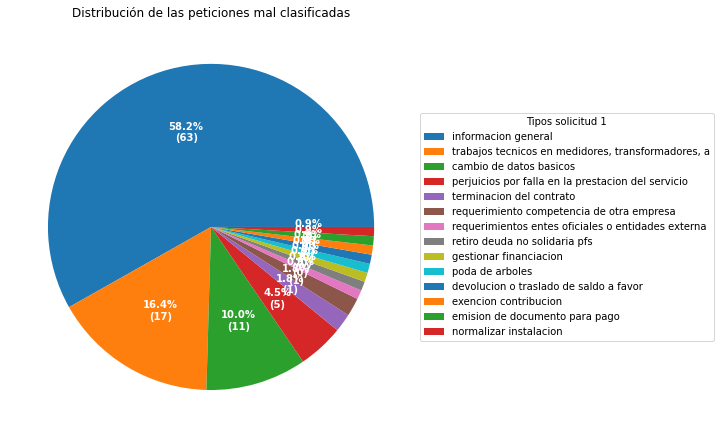

In [24]:
# distribucion de las peticiones mal clasificadas:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="peticion"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de las peticiones mal clasificadas")

plt.show()

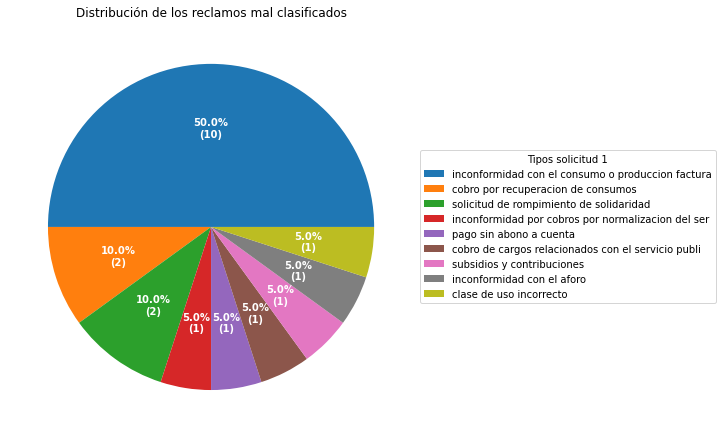

In [25]:
# Distribucion de los reclamos mal clasificados:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="reclamo"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de los reclamos mal clasificados")

plt.show()

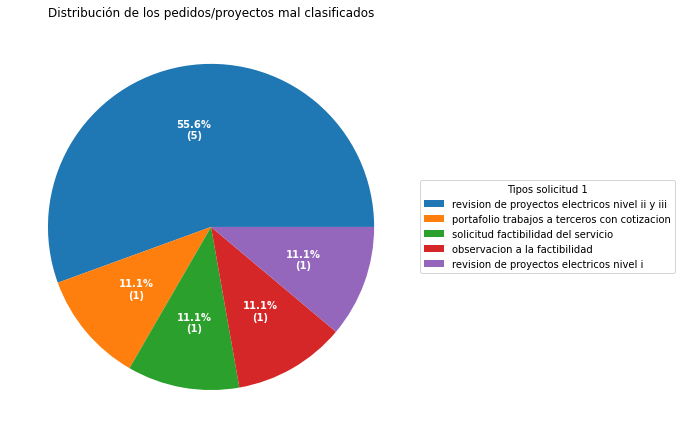

In [26]:
# Distribucion de los pedidos/proyectos mal clasificados:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="pedidos/proyectos"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de los pedidos/proyectos mal clasificados")

plt.show()

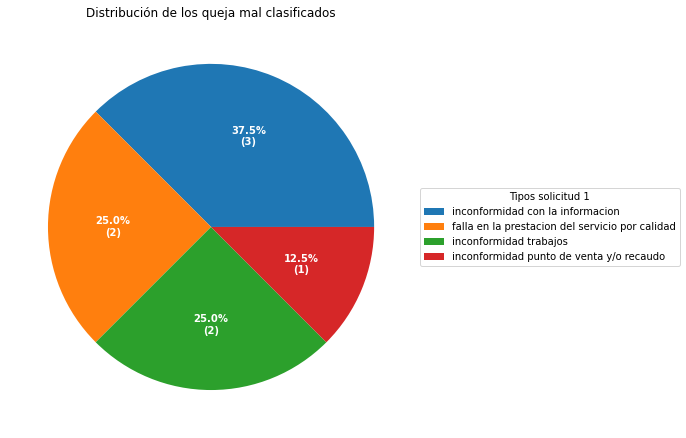

In [27]:
# Distribucion de los queja mal clasificados:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="queja"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de los queja mal clasificados")

plt.show()

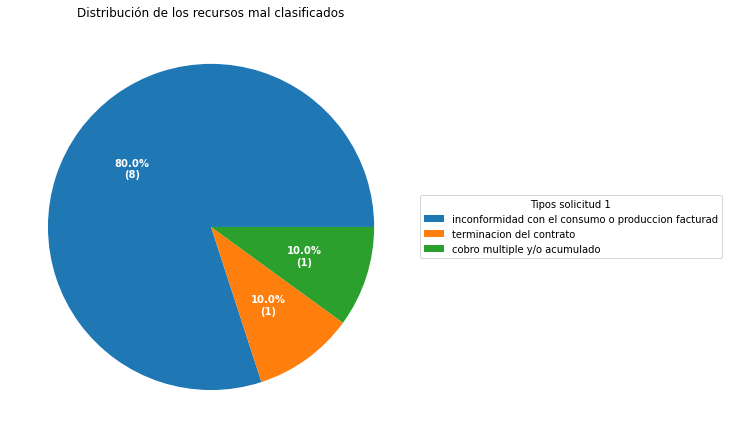

In [28]:
# Distribucion de los recursos mal clasificados:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="recurso"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de los recursos mal clasificados")

plt.show()

## Testeo del modelo LinearSCV_3_PQR.sav

Configuración del modelo:

- extracción de características: TF-IDF con bigramas con límite de frecuencia de palabras máximo de 90% y mínimo de 10 documentos.
- reducción de dimensionalidad: SVD con 250 componentes.
- clasificador: SVM con kernel lineal y un parámetro de regularización C=10

In [29]:
text_clf = pickle.load(open('LinearSCV_3_PQR.sav', 'rb'))
y_test = df_test['tipo_solicitud']
predictions = text_clf.predict(df_test['OBSERVACION USUARIO'])

test_acc = metrics.accuracy_score(y_test, predictions)

print(f"El accuracy en validación es de {round(test_acc, 3)}")

El accuracy en validación es de 0.763


In [30]:
print(metrics.classification_report(y_test, predictions))

                   precision    recall  f1-score   support

pedidos/proyectos       0.65      0.61      0.63       101
         peticion       0.87      0.79      0.83       473
            queja       0.46      0.79      0.58        43
          reclamo       0.66      0.82      0.73       104
          recurso       0.79      0.58      0.67        26

         accuracy                           0.76       747
        macro avg       0.69      0.72      0.69       747
     weighted avg       0.78      0.76      0.77       747



Precisión del clasificador: 76.31 

Matriz de Confusión: 
 [[ 62  36   3   0   0]
 [ 29 374  34  34   2]
 [  1   6  34   2   0]
 [  3  12   2  85   2]
 [  0   2   1   8  15]]


<AxesSubplot:>

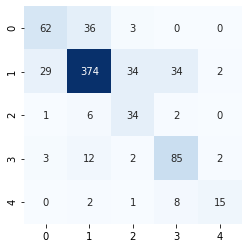

In [31]:
#Calculamos la precisión y mostramos la matriz de confusión
acc = metrics.accuracy_score(y_test, predictions)
mat = metrics.confusion_matrix(y_test, predictions)

print ("Precisión del clasificador: %.2f " %(acc*100.0) )
print ("\nMatriz de Confusión: \n", mat)

#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

### Comentarios

En lineas generales este clasificador tiene un rendimiento menor al LinearSCV_PQR.sav. con una diferencia de casi el 3%. No se proseguirá con los gráficos dado que no vale la pena visualizar un rendimiento menor.

## Testeo del modelo LinearSCV_PQR_web_email.sav

Configuración del modelo:

- extracción de características: TF-IDF con bigramas con límite de frecuencia de palabras máximo de 95% y mínimo de 2 documentos.
- reducción de dimensionalidad: SVD con 200 componentes.
- clasificador: SVM con kernel lineal y un parámetro de regularización C=10

In [40]:
text_clf = pickle.load(open('LinearSCV_PQR_web_email.sav', 'rb'))
y_test = df_test['tipo_solicitud']
predictions = text_clf.predict(df_test['OBSERVACION USUARIO'])

test_acc = metrics.accuracy_score(y_test, predictions)

print(f"El accuracy en validación es de {round(test_acc, 3)}")

El accuracy en validación es de 0.819


In [41]:
print(metrics.classification_report(y_test, predictions))

                   precision    recall  f1-score   support

pedidos/proyectos       0.91      0.69      0.79       101
         peticion       0.88      0.88      0.88       473
            queja       0.52      0.53      0.53        43
          reclamo       0.66      0.86      0.75       104
          recurso       0.84      0.62      0.71        26

         accuracy                           0.82       747
        macro avg       0.76      0.71      0.73       747
     weighted avg       0.83      0.82      0.82       747



In [42]:
malos_list = []
for i, r in enumerate(predictions):
    if r != y_test[i]:
        malos_list.append([r, df_test['tipo_solicitud'][i], df_test['tipo_solicitud_1'][i], df_test['OBSERVACION USUARIO'][i]])

In [43]:
len(malos_list)

135

In [44]:
df_malos = pd.DataFrame(malos_list, columns=['prediccion', 'observado', 'tipo_solicitud_1', 'OBSERVACION USUARIO'])
df_malos.head()

,prediccion,observado,tipo_solicitud_1,OBSERVACION USUARIO
0,peticion,pedidos/proyectos,portafolio instalaciones sin cotizacion,solicitud evaluar la posibilidad de la re ubic...
1,reclamo,peticion,informacion general,"tengan un buen día, el presente es con el fin ..."
2,pedidos/proyectos,queja,inconformidad trabajos,usuario inconforme por ubicación de contador e...
3,reclamo,peticion,informacion general,atentamente solicito revisión de la liquidació...
4,peticion,reclamo,subsidios y contribuciones,atentamente solicito reintegrar el valor cobra...


In [45]:
dict(df_malos[df_malos['observado']=="peticion"]['tipo_solicitud_1'].value_counts())

{'informacion general': 40,
 'trabajos tecnicos en medidores, transformadores, a': 6,
 'devolucion o traslado de saldo a favor': 3,
 'cambio de datos basicos': 2,
 'requerimiento competencia de otra empresa': 1,
 'retiro deuda no solidaria pfs': 1,
 'emision de documento para pago': 1,
 'requerimientos entes oficiales o entidades externa': 1,
 'perjuicios por falla en la prestacion del servicio': 1,
 'poda de arboles': 1,
 'condicion especial solicitud propietario': 1,
 'normalizar instalacion': 1}

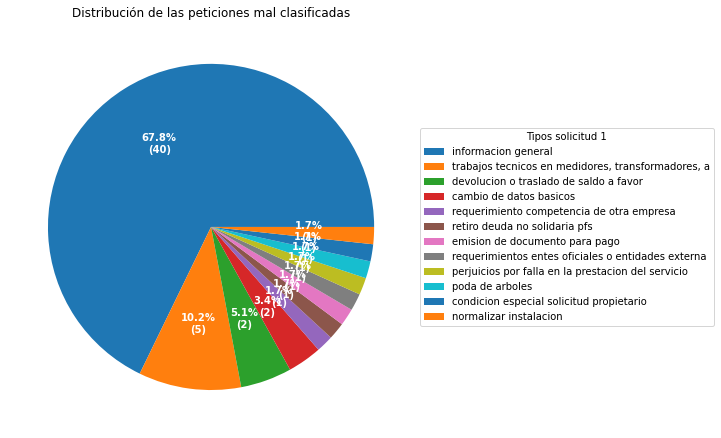

In [46]:
# distribucion de las peticiones mal clasificadas:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="peticion"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de las peticiones mal clasificadas")

plt.show()

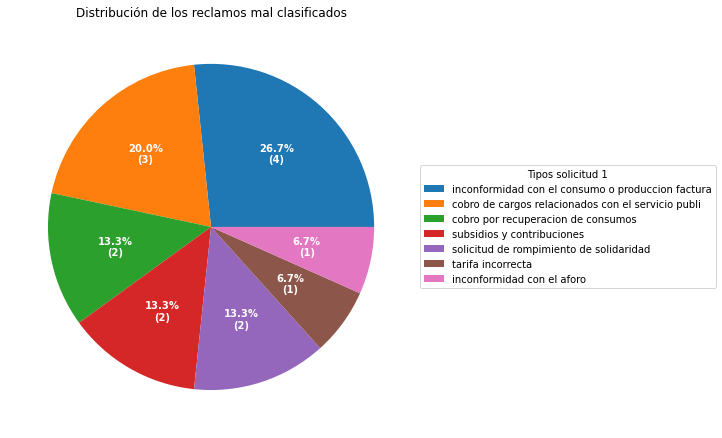

In [47]:
# Distribucion de los reclamos mal clasificados:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="reclamo"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de los reclamos mal clasificados")

plt.show()

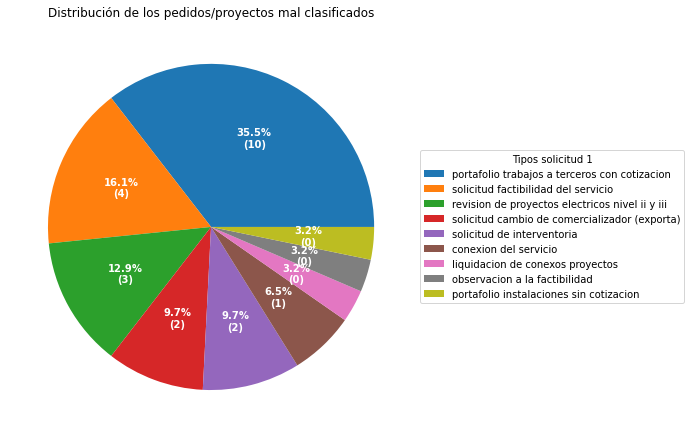

In [48]:
# Distribucion de los pedidos/proyectos mal clasificados:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="pedidos/proyectos"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de los pedidos/proyectos mal clasificados")

plt.show()

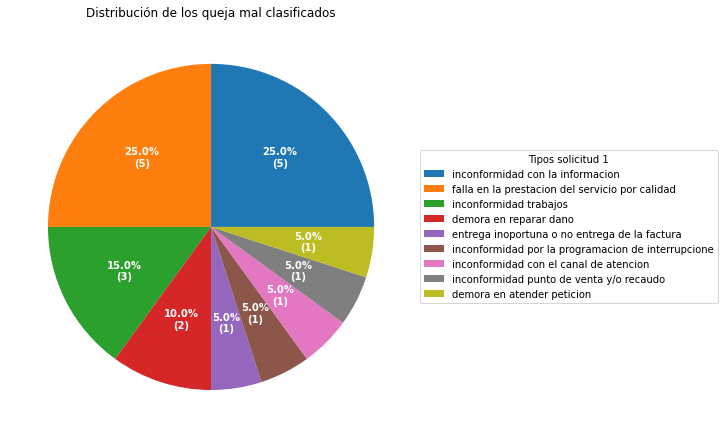

In [49]:
# Distribucion de los queja mal clasificados:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="queja"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de los queja mal clasificados")

plt.show()

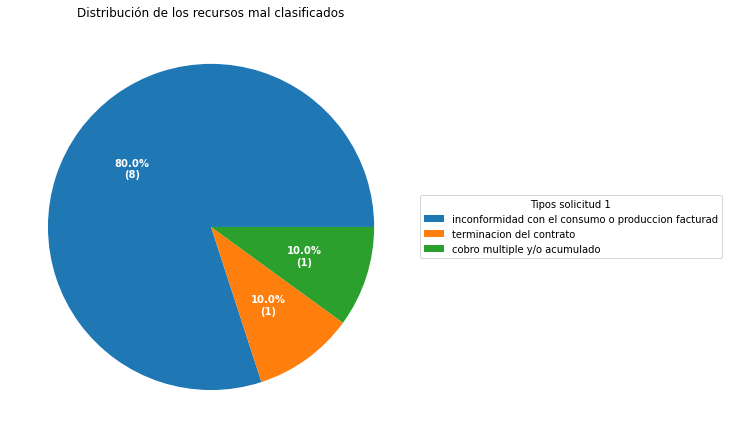

In [50]:
# Distribucion de los recursos mal clasificados:

fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw=dict(aspect="equal"))

recipe = dict(df_malos[df_malos['observado']=="recurso"]['tipo_solicitud_1'].value_counts())

data = [float(v) for k, v in recipe.items()]
labels = [k for k, v in recipe.items()]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Tipos solicitud 1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribución de los recursos mal clasificados")

plt.show()